# Sparse Autoencoder Tutorial: Mechanistic Interpretability through Sparse Representations

This notebook lets you test some sparse autoencoders! With options to customize and experiment with different architectures, sparsity constraints, and visualization methods.  
Sparse autoencoders are valuable for creating interpretable representations and analyzing which features are prioritized by the network.  

---

## Step 1: Generate Sample Data

We start by generating some random activation data - which will serve as input for training our autoencoder models.

We’ll create synthetic data to train our sparse autoencoders. This data will simulate activations, so we can focus on understanding how different architectures learn compact, sparse representations.

### Instructions:
1. Generate the sample data with the cell below.
2. Observe the output directory (`data/sample_activations.pt`) where the data is saved.

This data will be input for all the models in this tutorial. Do modify the code to experiment with different data dimensions!


In [38]:
# Data generation
import torch

# Generate random activation data (e.g., 1000 samples, 100-dimensional)
activation_data = torch.rand(1000, 100)
torch.save(activation_data, "../data/sample_activations.pt")
print("Sample data saved at '../data/sample_activations.pt'")


Sample data saved at '../data/sample_activations.pt'


## Step 2: Basic Sparse Autoencoder Model

We define & train a **basic sparse autoencoder**: a simple model with a single hidden layer. The sparsity is enforced by adding an L1 penalty to the loss function, so that most hidden neurons remain inactive for any given input.

### Check for:
- **Encoding Layer**: This layer transforms the data into a lower-dimensional, sparse representation.
- **Decoding Layer**: Attempts to reconstruct the original data from the encoded representation.
- **Sparsity Loss**: The L1 penalty helps make the encoding sparse, so only the most important features activate.

### Try This:
- **Change the Hidden Layer Dimension**: Modify the `hidden_dim` parameter to see how it impacts the reconstruction quality.
- **Adjust the Sparsity Penalty**: Experiment with `l1_lambda` in the loss function. Higher values will create more sparse encodings, possibly at the expense of reconstruction accuracy.

In [ ]:
# Define and train a basic sparse autoencoder with dynamic imports
import importlib.util
import torch
from torch.optim import Adam

# Fetch with path to autoencoder_basic.py
module_path = "../src/autoencoder_basic.py"
spec = importlib.util.spec_from_file_location("autoencoder_basic", module_path)
autoencoder_basic = importlib.util.module_from_spec(spec)
spec.loader.exec_module(autoencoder_basic)

# Access classes and functions from autoencoder_basic
BasicSparseAutoencoder = autoencoder_basic.BasicSparseAutoencoder
sparse_loss = autoencoder_basic.sparse_loss

# Load the data
data = torch.load("../data/sample_activations.pt").float()

# Initialize model and optimizer
model = BasicSparseAutoencoder(input_dim=100, hidden_dim=20)
optimizer = Adam(model.parameters(), lr=0.001)
epochs = 50
l1_lambda = 1e-3

# Train the model
for epoch in range(epochs):
    model.train()
    encoded, reconstructed = model(data)
    loss = sparse_loss(reconstructed, data, encoded, l1_lambda)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 0.08560974895954132
Epoch 10, Loss: 0.0844980850815773
Epoch 20, Loss: 0.08405675739049911
Epoch 30, Loss: 0.08345863968133926
Epoch 40, Loss: 0.08284711092710495


/tmp/ipykernel_2133/3105033439.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load("../data/sample_activations.pt").float()


## Step 3: Autoencoder Variations

Now that you’ve tried a basic sparse autoencoder, let’s experiment with more advanced architectures. Here are two variations:
1. **Deep Sparse Autoencoder**: Adds extra layers in the encoder and decoder - for more complex features.
2. **Convolutional Sparse Autoencoder**: Uses convolutional layers - particularly useful if your data has spatial or image-like structure.

You’ll see how deeper or convolutional layers impact sparsity and reconstruction.

### Instructions:
- Train a **Deep** and a **Convolutional Sparse Autoencoder** below.
- Try adjusting parameters like the hidden layer sizes, sparsity penalty, or even the architecture itself.

### Do you know:
- **Do deeper architectures improve reconstruction accuracy?**
- **How does a convolutional structure affect sparsity?**

Check which architecture performs best for your data!

In [ ]:
import importlib.util
import torch
from torch.optim import Adam

# Fetch with path to autoencoder_variations.py
module_path = "../src/autoencoder_variations.py"
spec = importlib.util.spec_from_file_location("autoencoder_variations", module_path)
autoencoder_variations = importlib.util.module_from_spec(spec)
spec.loader.exec_module(autoencoder_variations)

# Access the DeepSparseAutoencoder class from autoencoder_variations
DeepSparseAutoencoder = autoencoder_variations.DeepSparseAutoencoder

# Initialize and train a deep sparse autoencoder
deep_model = DeepSparseAutoencoder(input_dim=100, hidden_dims=[50, 20])
optimizer = Adam(deep_model.parameters(), lr=0.001)

# Training parameters
epochs = 50
l1_lambda = 1e-3

for epoch in range(epochs):
    deep_model.train()
    encoded, reconstructed = deep_model(data)
    loss = sparse_loss(reconstructed, data, encoded, l1_lambda)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Deep Model - Epoch {epoch}, Loss: {loss.item()}")


Deep Model - Epoch 0, Loss: 0.08427423238754272
Deep Model - Epoch 10, Loss: 0.08384954184293747
Deep Model - Epoch 20, Loss: 0.08361313492059708
Deep Model - Epoch 30, Loss: 0.08333949744701385
Deep Model - Epoch 40, Loss: 0.08295313268899918


### Convolutional Sparse Autoencoder
Test it here:

In [ ]:
import importlib.util
import torch
from torch.optim import Adam

# Fetch with path to autoencoder_variations.py
module_path = "../src/autoencoder_variations.py"
spec = importlib.util.spec_from_file_location("autoencoder_variations", module_path)
autoencoder_variations = importlib.util.module_from_spec(spec)
spec.loader.exec_module(autoencoder_variations)

# Access the ConvSparseAutoencoder class from autoencoder_variations
ConvSparseAutoencoder = autoencoder_variations.ConvSparseAutoencoder

# Reshape data for convolutional model
data = data.view(-1, 1, 10, 10)
conv_model = ConvSparseAutoencoder(input_channels=1, hidden_channels=16)
optimizer = Adam(conv_model.parameters(), lr=0.001)

# Training parameters
epochs = 50
l1_lambda = 1e-3

# Train the convolutional sparse autoencoder
for epoch in range(epochs):
    conv_model.train()
    encoded, reconstructed = conv_model(data)
    loss = sparse_loss(reconstructed, data, encoded, l1_lambda)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Conv Model - Epoch {epoch}, Loss: {loss.item()}")


Conv Model - Epoch 0, Loss: 0.08945164829492569
Conv Model - Epoch 10, Loss: 0.08569340407848358
Conv Model - Epoch 20, Loss: 0.08349330723285675
Conv Model - Epoch 30, Loss: 0.08208824694156647
Conv Model - Epoch 40, Loss: 0.08088558912277222


## Step 4: Visualizations and Analysis

Compare the **original** and **reconstructed data**!  
This shows how well each model learns to approximate the input using a sparse encoding.

### Instructions:
1. Select a sample index (`sample_idx`) and plot the original vs. reconstructed data.
2. Run the cell below for each model type (Basic, Deep, and Convolutional) to see how they differ.

**Change the Sample Index**! Choose different samples to see if certain types of data reconstruct better than others.


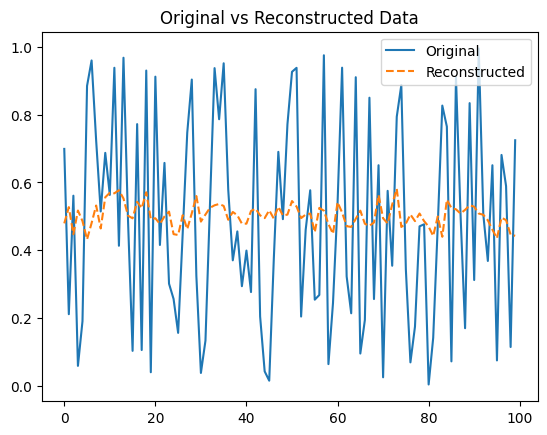

In [42]:
import matplotlib.pyplot as plt

# Select a sample for visualization
sample_idx = 0
original = data[sample_idx].view(-1).detach().numpy()
reconstructed = reconstructed[sample_idx].view(-1).detach().numpy()

plt.plot(original, label="Original")
plt.plot(reconstructed, label="Reconstructed", linestyle='--')
plt.legend()
plt.title("Original vs Reconstructed Data")
plt.show()


### Histogram of Hidden Layer Activations (Sparsity)

Check see how many neurons remain inactive (close to zero) for each input!

### Instructions:
1. Plot with the code below the activation histogram for each model.
2. Compare the results between the Basic, Deep, and Convolutional autoencoders.

### Try some things:
- **Adjust Sparsity Penalty (L1)**: Increase `l1_lambda` and re-run the training to see how it impacts the activation histogram.
- **Reduce Hidden Layer Size**: Set a smaller hidden dimension in the encoder and observe the activation distribution.

### Do you know:
- **Does increasing the L1 penalty make the histogram more sparse?**
- **How does the architecture type (Basic vs. Deep vs. Convolutional) affect sparsity?**

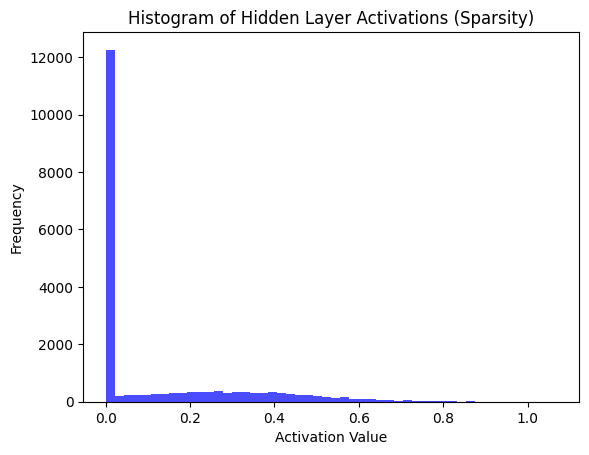

In [44]:
# Ensure data is in the correct shape for the fully connected model
# - needed before running BasicSparseAutoencoder or DeepSparseAutoencoder
data = data.view(-1, 100)  # Reshape back to [batch_size, input_dim]

# Plot histogram of activations for BasicSparseAutoencoder or DeepSparseAutoencoder
encoded, _ = model(data)
encoded_data = encoded.detach().numpy()

plt.hist(encoded_data.flatten(), bins=50, color="blue", alpha=0.7)
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.title("Histogram of Hidden Layer Activations (Sparsity)")
plt.show()


### Additional Exercises:
1. **Try Different Sparsity Levels**: Experiment further with the L1 penalty to see how it affects feature extraction and interpretability.
2. **Visualize Encoding with t-SNE**: Use dimensionality reduction (e.g., t-SNE) on the encoded representations to see if data points with similar features cluster together.
3. **Real Data**: Test the autoencoder on real-world data, such as image or text embeddings, to explore how sparse representations can reveal meaningful features.

Thank you for exploring sparse autoencoders! Mechanistic interpretability opens up exciting possibilities for understanding AI models — continue experimenting, and enjoy the journey!